In [1]:
# %matplotlib notebook

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [42]:
companies_df = pd.read_csv("sp500/sp500_companies.csv")
companies_df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,159.59,2675494354944,1.282180e+11,0.112,Cupertino,CA,United States,100000.0,"Apple Inc. designs, manufactures, and markets ...",0.065893
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,294.39,2210274213888,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.054436
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2665.61,1820760997888,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044842
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2673.81,1814979543040,9.114400e+10,0.324,Mountain View,CA,United States,156500.0,Alphabet Inc. provides online advertising serv...,0.044700
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3062.08,1558121021440,5.917500e+10,0.094,Seattle,WA,United States,1608000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038374


In [18]:
# Examine COVID 19 recession:

COVID_start = datetime(2020,2,1)
COVID_end = datetime(2020,2,28)

sector_list = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
sector_name = ["S_P500", "Financials","Consumer_Discretionary","Consumer_Staples","Health","Industrials","Information_Tech","Materials","Real_Estate","Tele_Services","Utilities","Energy"]
thisyear = ['^GSPC','^SP500-40','^SP500-25','^SP500-30',"^SP500-35","^SP500-20","^SP500-45","^SP500-15","^SP500-60","^SP500-50","^SP500-55","^GSPE"]
    
for sector in sector_list: 
    file_name=str(sector)+".csv"
    thisyear[sector_list.index(sector)] = globals()[sector] = yf.download(sector, COVID_start, COVID_end)
    thisyear[sector_list.index(sector)].to_csv(f"Output/{file_name}", index=True, header=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
Energy = "Output/^GSPE.csv"
Materials = "Output/^SP500-15.csv"
Industrials = "Output/^SP500-20.csv"
Consumer_Disc = "Output/^SP500-25.csv"
Consumer_Stap = "Output/^SP500-30.csv"
Health_Care = "Output/^SP500-35.csv"
Financial = "Output/^SP500-40.csv"
Technology = "Output/^SP500-45.csv"
Communications = "Output/^SP500-50.csv"
Utilities = "Output/^SP500-55.csv"
Real_Estate = "Output/^SP500-60.csv"


In [37]:
Energy_df = pd.read_csv(Energy)
Materials_df = pd.read_csv(Materials)
Industrials_df = pd.read_csv(Industrials)
Consumer_Disc_df = pd.read_csv(Consumer_Disc)
Consumer_Stap_df = pd.read_csv(Consumer_Stap)
Health_Care_df = pd.read_csv(Health_Care)
Financial_df = pd.read_csv(Financial)
Technology_df = pd.read_csv(Technology)
Communications_df = pd.read_csv(Communications)
Utilities_df = pd.read_csv(Utilities)
Real_Estate_df = pd.read_csv(Real_Estate)


In [38]:
Energy_Cleaned_df=Energy_df.rename(columns={"Open":"Energy Open", "High": "Energy High", "Low": "Energy Low", "Close":"Energy Close", "Adj Close":"Adj Close Energy", "Volume":"Energy Volume"})
Materials_Cleaned_df=Materials_df.rename(columns={"Open":"Materials Open", "High": "Materials High", "Low": "Materials Low", "Close":"Materials Close", "Adj Close":"Adj Close Materials", "Volume":"Materials Volume"})


In [40]:
combined1_df = pd.merge(Energy_Cleaned_df, Materials_Cleaned_df, how="left", on=["Date", "Date"])
combined1_df

,Date,Energy Open,Energy High,Energy Low,Energy Close,Adj Close Energy,Energy Volume,Materials Open,Materials High,Materials Low,Materials Close,Adj Close Materials,Materials Volume
0,2020-01-31,418.790009,418.790009,403.320007,405.450012,405.450012,264589800,366.609985,367.059998,360.809998,361.989990,361.989990,170002300
1,2020-02-03,405.450012,405.450012,398.559998,400.019989,400.019989,186604900,363.209991,371.079987,363.040009,369.720001,369.720001,120282600
2,2020-02-04,400.019989,408.570007,400.019989,400.809998,400.809998,195870900,372.750000,377.959991,372.429993,376.170013,376.170013,114738400
3,2020-02-05,400.809998,417.250000,400.809998,415.970001,415.970001,192181900,379.029999,383.540009,376.630005,383.179993,383.179993,118869200
4,2020-02-06,415.970001,417.440002,410.910004,411.640015,411.640015,131414900,383.940002,384.160004,381.350006,382.869995,382.869995,95422300
5,2020-02-07,411.640015,411.640015,406.720001,408.549988,408.549988,132893800,380.140015,380.200012,376.070007,377.269989,377.269989,76969600
6,2020-02-10,408.549988,408.549988,402.790009,405.239990,405.239990,152126500,376.959991,378.100006,375.970001,377.329987,377.329987,70030700
7,2020-02-11,405.239990,410.890015,405.239990,409.470001,409.470001,144664100,378.869995,382.609985,378.869995,379.269989,379.269989,80536500
8,2020-02-12,409.470001,417.200012,409.470001,415.029999,415.029999,169566200,380.720001,381.839996,380.079987,381.260010,381.260010,72022200
9,2020-02-13,415.029999,415.739990,410.970001,413.149994,413.149994,183727300,381.470001,382.290009,378.880005,379.809998,379.809998,81929500


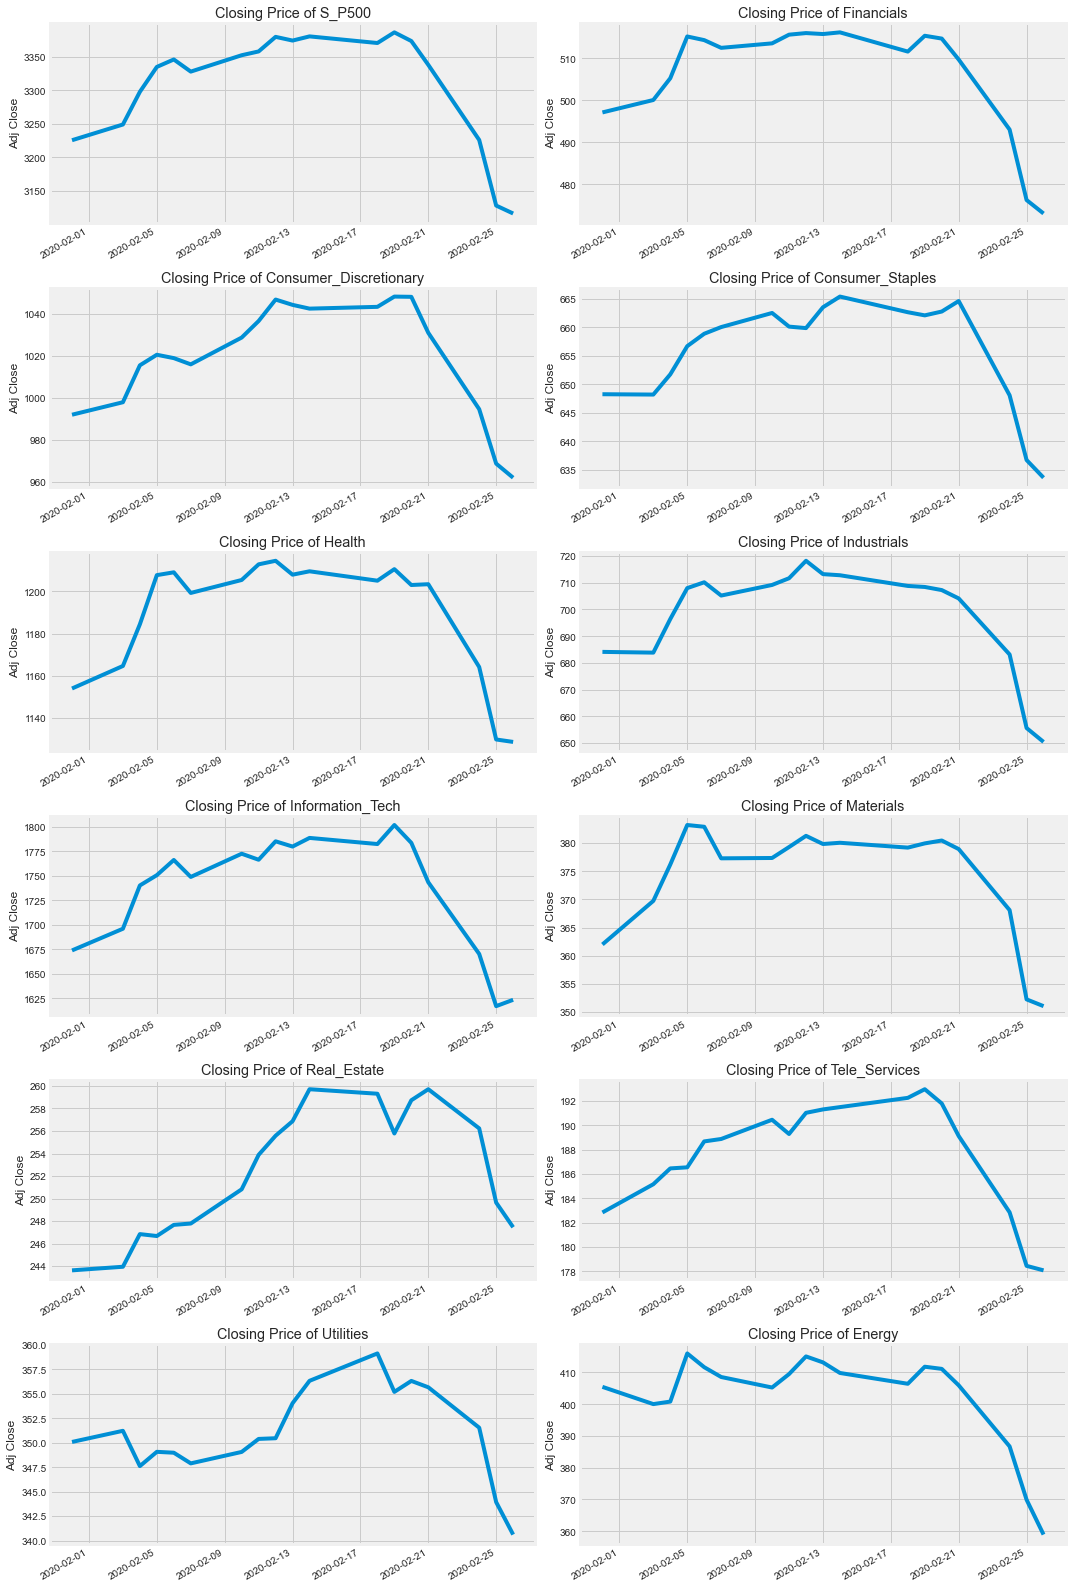

In [41]:
plt.figure(figsize=(15, 40))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, sector in enumerate(sector_list, 1):
    plt.subplot(11, 2, i)
    thisyear[i-1]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {sector_name[i - 1]}")
plt.tight_layout()
plt.savefig(f"Adj Close Change by Sectors({COVID_start.year}).png")  